#Customer Churn Prediction & Business Impact App


###Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

###Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio X/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

###Data Cleaning
####Convert TotalCharges to numeric

In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

###Drop missing values

In [4]:
df.dropna(inplace=True)

###Drop customerID as it's not useful for modeling

In [5]:
df.drop('customerID', axis=1, inplace=True)

###Encode binary categorical columns

In [6]:
yes_no_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


###Replace 'No internet service' and 'No phone service' with 'No'

In [7]:
cols_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_replace:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

###One-hot encode remaining categorical features

In [8]:
df = pd.get_dummies(df, drop_first=True)

###EDA

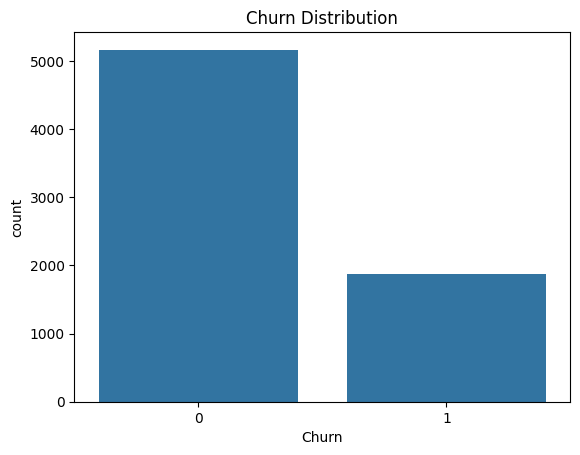

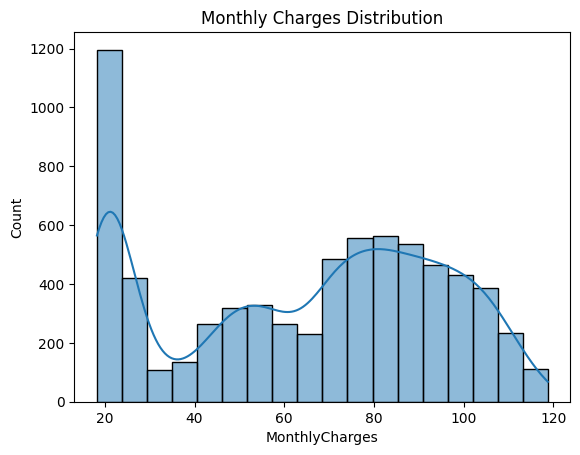

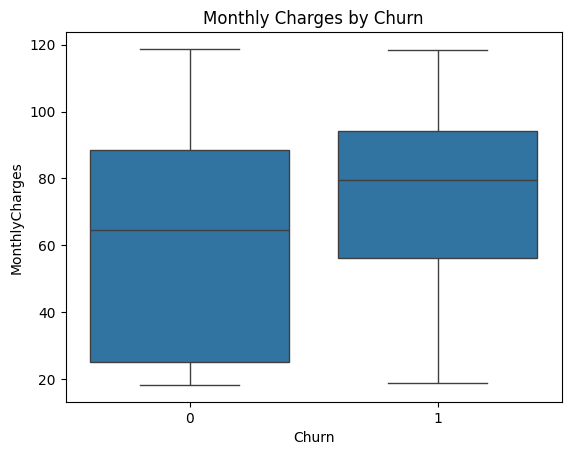

In [9]:
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

###Feature Scaling & Splitting

In [11]:
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

###Model Training

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

###Evaluation

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.783226723525231
ROC AUC: 0.6817974747762346
Confusion Matrix:
 [[928 105]
 [200 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



###Save the model and scaler

In [18]:
# Step 8: Save the model and scaler
joblib.dump(model, '/content/drive/MyDrive/Portfolio X/Customer Churn Prediction/churn_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/Portfolio X/Customer Churn Prediction/scaler.pkl')


['/content/drive/MyDrive/Portfolio X/Customer Churn Prediction/scaler.pkl']

In [19]:
features = X.columns.tolist()
joblib.dump(features, '/content/drive/MyDrive/Portfolio X/Customer Churn Prediction/features.pkl')


['/content/drive/MyDrive/Portfolio X/Customer Churn Prediction/features.pkl']